In [44]:
import os.path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Получаем необходимый путь

In [3]:
file_path = os.getcwd()
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(file_path)))

In [70]:
SHARED_DIR = os.path.join(BASE_DIR, 'shared')
HOMEWORKS_DIR = os.path.join(SHARED_DIR, 'homeworks')
PYTHON_MINIPROJECTS_DIR = os.path.join(HOMEWORKS_DIR, 'python_ds_miniprojects')
MINIPROJECT_4_DIR = os.path.join(PYTHON_MINIPROJECTS_DIR, '4')
searched_format = '.csv'

### Осуществляем поиск анализируемых .csv файлов и их слияние в один датафрейм, добавляя колонки "name" и "data":

In [71]:
# returns date information and name formed from filepath
def get_client_information(filename):
    client_data = filename.rsplit('data')[1].split('/')
    [client_data.remove('') for i in client_data if i == '']
    return client_data[0], client_data[1]

In [72]:
# adds "date" and "name" columns in proccessing dataframe 
def reformat_dataframe(df, date, name):
    df = df.drop(columns='Unnamed: 0')
    df['date'] = date
    df['name'] = name
    return df

In [73]:
counter = 0
for dirpath, dirnames, filenames in os.walk(MINIPROJECT_4_DIR):
    for file in filenames:
        if searched_format in file:
            
            # Determine path for .csv file
            path = os.path.normpath(os.path.join(dirpath, file))
            
            # Creating general dataframe from the first .csv file
            if counter == 0:
                df_general = pd.read_csv(path)
                client_date, client_name = get_client_information(path)
                df_general = reformat_dataframe(df_general, client_date, client_name)
                counter = 1
                continue
            
            # Creating interbedded dataframe from the rest of .csv
            df_interbedded = pd.read_csv(path)
            
            # Gain date information and name formed from filepath for interbedded dataframe
            client_date, client_name = get_client_information(path)
            
            # Adding "date" and "name" columns in proccessing interbedded dataframe
            df_interbedded = reformat_dataframe(df_interbedded, client_date, client_name)
            
            # Concantenation general and interbedded dataframes
            df_general = pd.concat([df_general, df_interbedded])

# Reset indexes of general dataframe
df_general.reset_index(drop=True, inplace=True)    

In [74]:
df_general.quantity.sum()

480

In [75]:
df_general.query("name == 'Petr_Ivanov'")

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
83,20,4,2020-12-04,Petr_Ivanov
84,36,1,2020-12-04,Petr_Ivanov
85,74,5,2020-12-04,Petr_Ivanov


### Определяем, какой пользователь купил больше всего товаров:

In [76]:
purchase_rate_df = df_general.groupby('name', as_index=False) \
                              .agg({'quantity': 'sum'}) \
                              .sort_values('quantity', ascending=False)`

SyntaxError: invalid syntax (<ipython-input-76-1378770e0737>, line 3)

In [77]:
purchase_rate_df

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [78]:
[i for i in purchase_rate_df.head(2).name]

['Alexey_Smirnov', 'Petr_Smirnov']

### Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот:

In [79]:
df_general.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [80]:
top_10_products = df_general \
                            .groupby('product_id', as_index=False) \
                            .agg({'quantity': 'sum'}) \
                            .sort_values('quantity', ascending=False) \
                            .head(10)
top_10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [81]:
order_list = [i for i in top_10_products.product_id]

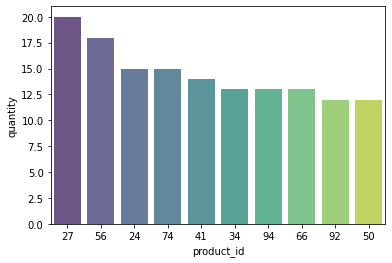

In [82]:
sns.barplot(x='product_id', y='quantity', data=top_10_products, palette="viridis", alpha=.8, order=order_list)

### Визуализируем продажи по дням:

In [83]:
quantity_by_days = df_general \
                            .groupby('date', as_index=False) \
                            .agg({'quantity': 'sum'})

In [84]:
quantity_by_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


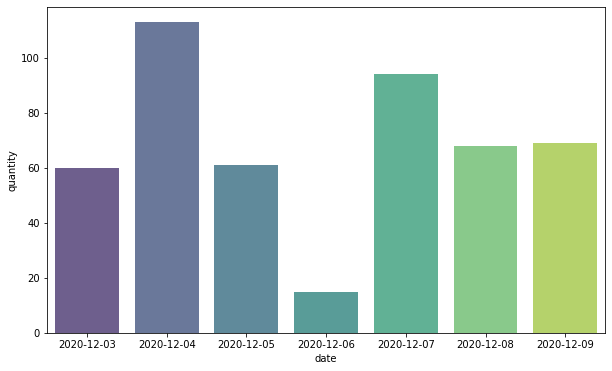

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='quantity', data=quantity_by_days, palette="viridis", alpha=.8)

### Определим пользователей, который приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [104]:
df_general.head(10)

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
5,55,3,2020-12-05,Petr_Smirnov
6,49,3,2020-12-05,Petr_Smirnov
7,22,5,2020-12-05,Petr_Smirnov
8,83,4,2020-12-05,Petr_Smirnov
9,66,2,2020-12-05,Rostislav_Smirnov


##### Вариант 1

In [129]:
df_general.drop_duplicates(subset=['date', 'name', 'product_id']) \
          .groupby('product_id') \
          .name \
          .value_counts() \
          .sort_values(ascending=False)

product_id  name             
15          Anton_Ivanov         2
94          Petr_Fedorov         2
99          Rostislav_Smirnov    1
27          Rostislav_Petrov     1
32          Rostislav_Petrov     1
                                ..
64          Vasiliy_Ivanov       1
            Rostislav_Petrov     1
            Petr_Petrov          1
            Alexey_Smirnov       1
0           Vasiliy_Ivanov       1
Name: name, Length: 158, dtype: int64

##### Вариант 2

In [125]:
df_general.drop_duplicates(subset=['date', 'name', 'product_id']) \
                                            .groupby(['product_id', 'name'], as_index=False) \
                                            .agg({'date': 'count'}) \
                                            .rename(columns={'date': 'purchases_number'}) \
                                            .sort_values('purchases_number', ascending=False) \
                                            .query("purchases_number > 1")


,product_id,name,purchases_number
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2


##### Вариант 3

In [123]:
df_general.groupby(['name', 'product_id']) \
          .agg({'date': pd.Series.nunique}) \
          .rename(columns={'date': 'purchases_number'}) \
          .query("purchases_number > 1")

,,purchases_number
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
